In [1]:
# Imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

np.random.seed(0)
pd.__version__

'0.22.0'

In [2]:
# Load train data
train_labels = pd.read_csv('../Data/final/train_labels_processed.csv', sep=',', engine='python')
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
print('Train data done')

# Load test data
test_labels = pd.read_csv('../Data/final/test_labels_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')
print('Test data done')

Train data done
Test data done


In [3]:
# Creampy numpy arrays
np_test = np.asarray(test_labels)
np_train = np.asarray(train_labels)

# Describe the label data
print(test_labels.describe())
print(train_labels.describe())

                raw
count  37854.000000
mean       0.013276
std        0.162382
min       -2.976000
25%       -0.025072
50%        0.006000
75%        0.038570
max        5.262999
                 raw
count  130000.000000
mean        0.014118
std         0.166570
min        -4.655420
25%        -0.025300
50%         0.006000
75%         0.039200
max         4.737000


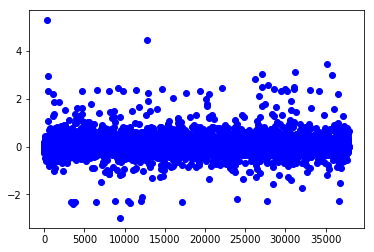

In [4]:
# Simple plot of the test data
plt.plot(np_test,'bo')

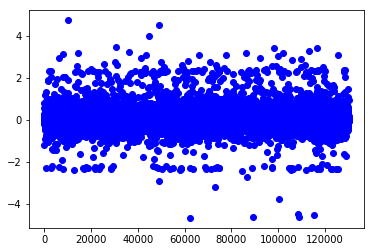

In [5]:
# Simple plot of the train data
plt.plot(np_train, 'bo')

In [11]:
from sklearn.decomposition import PCA

# Apply a PCA to the data
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(train_data, train_labels)

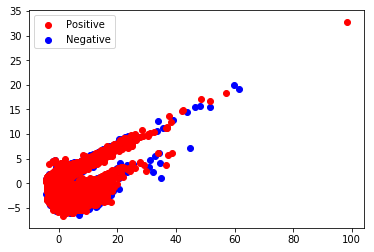

In [12]:
# Split positive and negative log error
pos = pca_transform[train_labels['raw'] > 0]
neg = pca_transform[train_labels['raw'] <= 0]   

# Plot the data
neg_scatter = plt.scatter(x=neg[:,0], y=neg[:,1], color='b')
pos_scatter = plt.scatter(x=pos[:,0], y=pos[:,1], color='r')
plt.legend((pos_scatter, neg_scatter),("Positive", "Negative"))